In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../dataset.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

In [3]:
def normalize(df):
    df = (df - df.min()) / (df.max() - df.min())
    
    return df

In [4]:
df = normalize(df)
df.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.117647  0.693467       0.508197       0.318182  0.000000  0.416873   
1     0.000000  0.422111       0.672131       0.281818  0.168011  0.473945   
2     0.000000  0.728643       0.000000       0.000000  0.000000  0.548387   
3     0.000000  0.678392       0.557377       0.381818  0.336022  0.524814   
4     0.058824  0.698492       0.508197       0.372727  0.645161  0.504963   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.020922  0.433333      1.0  
1                  0.066183  0.033333      0.0  
2                  0.235696  0.166667      1.0  
3                  0.122545  0.050000      1.0  
4                  0.195559  0.000000      0.0

In [5]:
import numpy as np
from random import randrange
from math import exp

In [6]:
def random_split(dataset, outcome, size=0.3):
    test, outcome_test = [], []
    training, training_outcome = dataset.copy(), outcome.copy()
    
    size = int(size * len(dataset))
    for _ in range(size):
        rindex = randrange(len(training))
        test.append(training[rindex])
        outcome_test.append(training_outcome[rindex])
        
        training = np.delete(training, rindex, 0)
        training_outcome = np.delete(training_outcome, rindex)
        
    return training, training_outcome, test, outcome_test

In [7]:
columns = df.columns
target = 'Outcome'
X = df[[column for column in columns if column != target]].to_numpy()
y = df[target].to_numpy()

In [8]:
X_training, y_training, X_test, y_test = random_split(X, y, size=0.2)

In [9]:
def sigmoid(num):
    return 1.0 / (1 + exp(-num))

In [10]:
def fit(X, y, alpha=0.001, repeat=20):
    weights = np.array([1.0] * len(X[0]))
    
    for _ in range(repeat):
        for i, row in enumerate(X):
            h = sigmoid(np.sum(row * weights))
            err = y[i] - h
            weights += alpha * row * err
            
    return weights

In [11]:
weights = fit(X_training, y_training, repeat=100)

In [12]:
def test(weights, X_test):
    
    predicted = []
    for row in X_test:
        predicted.append(round(sigmoid(np.sum(row * weights))))
        
    return predicted

In [13]:
predicted = test(weights, X_test)

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [15]:
fpr, tpr, thresh = roc_curve(y_test, predicted, pos_label=1)
auc_score = roc_auc_score(y_test, predicted)

In [16]:
print(f"Accuracy: {auc_score}")

Accuracy: 0.5529513888888888


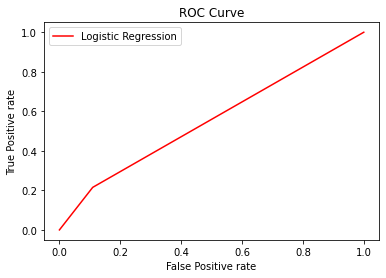

In [17]:
plt.plot(fpr, tpr, color="red", label="Logistic Regression")
plt.title("ROC Curve")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend(loc='best')
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[228,  28],
       [113,  31]], dtype=int64)